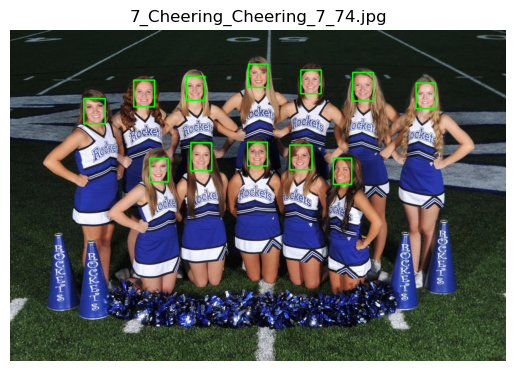

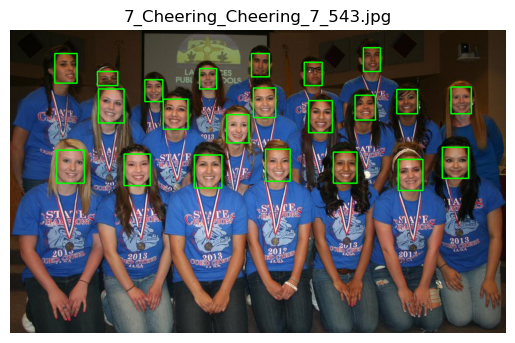

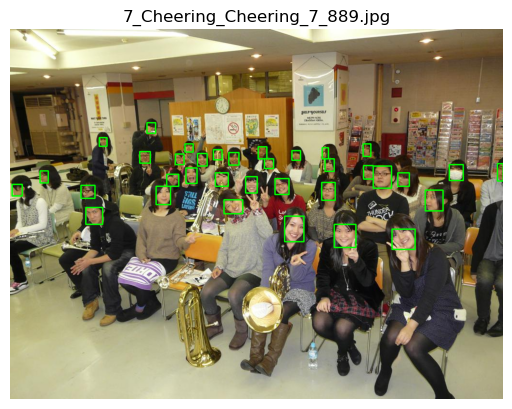

Checking cropped images...
7_Cheering_Cheering_7_74 12


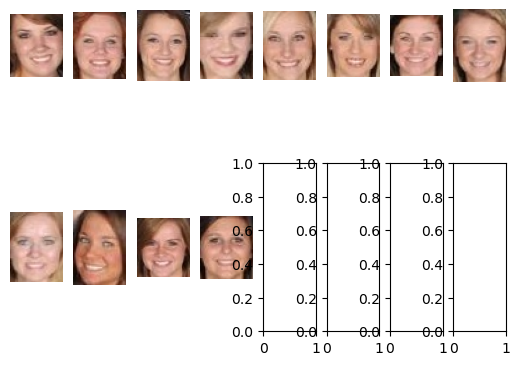

7_Cheering_Cheering_7_543 22


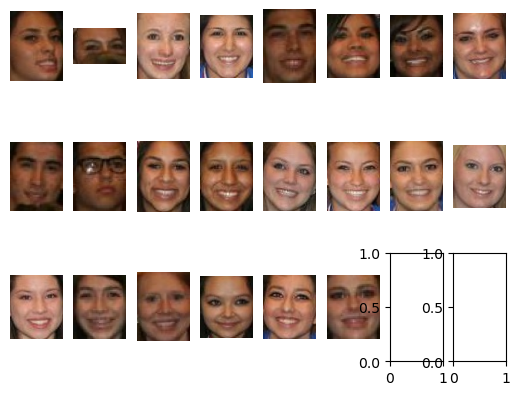

7_Cheering_Cheering_7_889 35


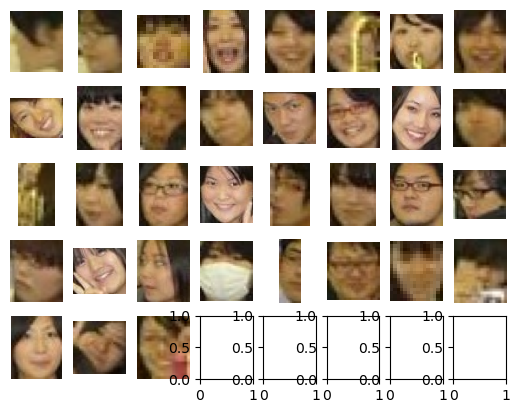

Face Detection using dlib:
7_Cheering_Cheering_7_889.jpg #det1: 7


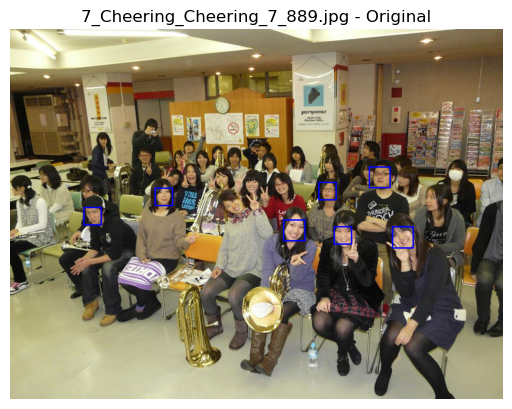

7_Cheering_Cheering_7_889.jpg #det2: 11


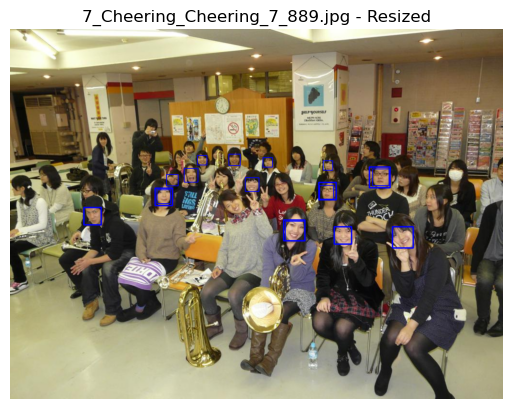

In [3]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

pkl_path = 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path,"rb"))
data_dir = 'data_dir'

def draw_bbox():
    # Enter your code here and remove the following pass (20%)
    for img_name, bboxes in annotate_dict.items():
        img_path = os.path.join(data_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Image {img_name} not found in {data_dir}")
            continue
        for bbox in bboxes:
            x1, y1, x2, y2 = bbox
            cv2.rectangle(img, (x1, y1), (x2,y2), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(img_name)
        plt.axis('off')
        plt.show()

def save_bbox():
    save_dir = 'save_dir' # Do not change this line
    # Enter your code here (20%)    
    if not os.path.exists(save_dir):
        return
    for img_name, bboxes in annotate_dict.items():
        img_path = os.path.join(data_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Image {img_name} not found in {data_dir}")
            continue
        for i, bbox in enumerate(bboxes):
            x1, y1, x2, y2 = bbox
            cropped_face = img[y1:y2, x1:x2]
            save_path = os.path.join(save_dir, f"{img_name[:-4]}_{i}.jpg")
            cv2.imwrite(save_path, cropped_face)
# Do not modify the following two functions. They will be used to check your code.
def display_img_list(img_list):
    col = 8
    row = int(np.ceil(len(img_list)/8))
    k = 0
    fig, ax = plt.subplots(row, col)
    for i in range(row):
        for j in range(col):
            k = j+i*col
            if k < len(img_list):
                ax[i,j].imshow(img_list[k])
                ax[i,j].axis('off')
    plt.show()

def check_bbox():
    save_dir = 'save_dir'
    data_dict = {}
    if not os.path.exists(save_dir):
        print('save_dir is not created!')
        return
    if len(os.listdir(save_dir)) < 10:
        print('cropped faces are not generated!')
        return
    for img_name in annotate_dict:
        img_name = img_name[:-4]
        data_dict[img_name] = []
        for bbox_name in os.listdir(save_dir):
            if img_name in bbox_name:
                bbox_path = os.path.join(save_dir, bbox_name)
                img = cv2.imread(bbox_path)
                data_dict[img_name].append(img[:,:,::-1])
    for img_name in data_dict:
        print(img_name, len(data_dict[img_name]))
        display_img_list(data_dict[img_name])

def test_dlib():
    # Enter your code here and remove the following pass (30%)
    detector = dlib.get_frontal_face_detector()
    img_name = "7_Cheering_Cheering_7_889.jpg"
    img_path = os.path.join(data_dir, img_name)
    
    img = cv2.imread(img_path)
    if img is None:
        print(f"Image {img_name} not found in {data_dir}")
        return
    
    dets = detector(img, 1)
    print(f"{img_name} #det1: {len(dets)}")
    
    for det in dets:
        x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{img_name} - Original")
    plt.axis('off')
    plt.show()
    
    height, width = img.shape[:2]
    new_height = 1400
    new_width = int((new_height / height) * width)
    resized_img = cv2.resize(img, (new_width, new_height))
    
    dets_resized = detector(resized_img, 1)
    print(f"{img_name} #det2: {len(dets_resized)}")
    
    for det in dets_resized:
        x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
        cv2.rectangle(resized_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.title(f"{img_name} - Resized")
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    # When submitting assignment_2a, please do not modify the following lines  
    draw_bbox()
    save_bbox()
    print('Checking cropped images...')  
    check_bbox()
    print('Face Detection using dlib:')
    test_dlib()

